## Классификация MNIST

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), https://t.me/s/girafe_ai

In [1]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

Давайте обратимся к классической задаче распознавания рукописных цифр. Мы будем работать с набором данных [MNIST](http://yann.lecun.com/exdb/mnist/). В этом задании мы воспользуемся всем датасетом целиком.

__Ваша основная задача: реализовать весь пайплайн обучения модели и добиться качества $\geq 92\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбуку с первого занятия.

Мы настоятельно рекомендуем писать код «с нуля», лишь изредка подглядывая в готовые примеры, а не просто «копировать-вставлять». Это поможет вам в будущем.

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.03MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:06<00:00, 247kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.36MB/s]


Text(0.5, 1.0, 'Image label: 2')

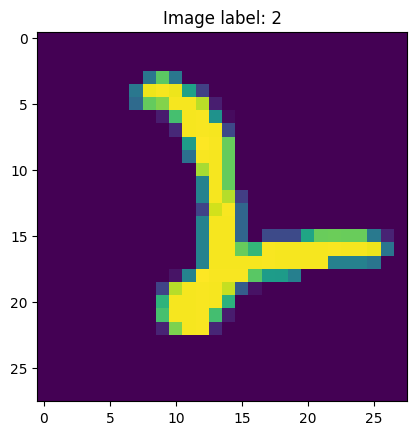

In [2]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_mnist_data = MNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')
# __________end of block__________

Постройте модель, представленную ниже. Пожалуйста, не создавайте чрезмерно сложную сеть — она не должна быть глубже четырёх слоёв (можно и меньше). Ваша основная задача — обучить модель и добиться как минимум 92% точности на тестовой выборке (hold-out выборке).

*Примечание: линейных слоёв и функций активации должно быть достаточно.*

__Обратите внимание, ваша модель должна быть представлена переменной `model`__

In [3]:
# Creating model instance
model = nn.Sequential(nn.Flatten(),
                      nn.Linear(28 * 28, 28 * 28),
                      nn.ReLU(),
                      nn.Linear(28 * 28, 10)
                      ) # your code here

Ниже доступны локальные тесты для проверки вашей модели:

In [4]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, 'Please, use `model` variable to store your model'

try:
    x = random_batch[0].reshape(-1, 784)
    y = random_batch[1]

    # compute outputs given inputs, both are variables
    y_predicted = model(x)
except Exception as e:
    print('Something is wrong with the model')
    raise e


assert y_predicted.shape[-1] == 10, 'Model should predict 10 logits/probas'

print('Everything seems fine!')
# __________end of block__________

Everything seems fine!


Обучите модель на обучающей выборке. Рекомендуем поэкспериментировать с различными оптимизаторами.


In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [6]:
model = model.to(device)

In [7]:
# your code here
crit = nn.CrossEntropyLoss()
lr = 1e-3
opt = torch.optim.Adam(model.parameters(), lr=lr)

In [8]:
epochs = 20

In [12]:
for epoch in range(epochs):
    model.train()
    mean_train_loss = 0
    mean_train_acc = 0
    for X, label in train_data_loader:

        X, label = X.to(device), label.to(device)
        opt.zero_grad()
        output = model(X)
        loss = crit(output, label)

        loss.backward()
        opt.step()
        with torch.no_grad():
            mean_train_loss += loss
            mean_train_acc += torch.sum(torch.argmax(output, dim=1) == label, dtype=torch.float32)
    with torch.no_grad():
        mean_train_loss /= float(len(train_data_loader))
        mean_train_acc /= float(len(train_mnist_data))

    model.eval()
    mean_test_loss = 0
    mean_test_acc = 0
    with torch.no_grad():
        for X, label in test_data_loader:
            X, label = X.to(device), label.to(device)
            output = model(X)
            loss = crit(output, label)
            mean_test_loss += loss
            mean_test_acc += torch.sum(torch.argmax(output, dim=1) == label, dtype=torch.float32)
        mean_test_loss /= len(test_data_loader)
        mean_test_acc /= len(test_mnist_data)
    print(f'Epoch {epoch + 1} from {epochs}. \n Train loss: {mean_train_loss} \n Train accuracy: {mean_train_acc} \n Test loss: {mean_test_loss} \n Test accuracy: {mean_test_acc}')


Epoch 1 from 20. 
 Train loss: 0.01714368909597397 
 Train accuracy: 0.9944333434104919 
 Test loss: 0.08293259143829346 
 Test accuracy: 0.9787999987602234
Epoch 2 from 20. 
 Train loss: 0.012469116598367691 
 Train accuracy: 0.9956333637237549 
 Test loss: 0.09092633426189423 
 Test accuracy: 0.9784999489784241
Epoch 3 from 20. 
 Train loss: 0.01308362651616335 
 Train accuracy: 0.9956166744232178 
 Test loss: 0.10858729481697083 
 Test accuracy: 0.974299967288971
Epoch 4 from 20. 
 Train loss: 0.010462253354489803 
 Train accuracy: 0.9967166781425476 
 Test loss: 0.09857858717441559 
 Test accuracy: 0.9772999882698059
Epoch 5 from 20. 
 Train loss: 0.009632203727960587 
 Train accuracy: 0.9967666864395142 
 Test loss: 0.08494456857442856 
 Test accuracy: 0.9804999828338623
Epoch 6 from 20. 
 Train loss: 0.007436005864292383 
 Train accuracy: 0.9977499842643738 
 Test loss: 0.09690912067890167 
 Test accuracy: 0.98089998960495


KeyboardInterrupt: 

Также помните, что вы всегда можете обратиться к отличной [документации](https://pytorch.org/docs/stable/index.html) и [учебным материалам](https://pytorch.org/tutorials/).

Оценим качество классификации:

In [16]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].to(device).reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels).to(device)
real_labels = torch.cat(real_labels).to(device)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [17]:
print(f'Neural network accuracy on train set: {train_acc:3.5}')

Neural network accuracy on train set: 0.99812


In [19]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].to(device).reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels).to(device)
real_labels = torch.cat(real_labels).to(device)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [20]:
print(f'Neural network accuracy on test set: {test_acc:3.5}')

Neural network accuracy on test set: 0.982


Проверка, что пороги пройдены:

In [21]:
assert test_acc >= 0.92, 'Test accuracy is below 0.92 threshold'
assert train_acc >= 0.91, 'Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow'

Обращаем внимане, код ниже предполагает, что ваша модель имеет содержится в переменной `model`, а файл `hw_mnist_data_dict.npy` находится в той же директории, что и ноутбук (он доступен в репозитории).

In [25]:
!cd
!ls

hw_mnist_data_dict.npy	MNIST  sample_data


In [27]:
model = model.to('cpu')

In [28]:
# do not change the code in the block below
# __________start of block__________
import os
import json
assert os.path.exists('hw_mnist_data_dict.npy'), 'Please, download `hw_mnist_data_dict.npy` and place it in the working directory'

def get_predictions(model, eval_data, step=10):

    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx:idx+step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))

    predicted_labels = torch.cat(predicted_labels).numpy()
    predicted_labels = ','.join([str(x) for x in list(predicted_labels)])
    return predicted_labels

loaded_data_dict = np.load('hw_mnist_data_dict.npy', allow_pickle=True)

submission_dict = {
    'train': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['train'])),
    'test': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['test']))
}

with open('submission_dict_mnist_task_1.json', 'w') as iofile:
    json.dump(submission_dict, iofile)
print('File saved to `submission_dict_mnist_task_1.json`')
# __________end of block__________

File saved to `submission_dict_mnist_task_1.json`


### Сдача задания
Сдайте сгенерированный файл в соответствующую задачу в соревновании, а именно:
    
* `submission_dict_mnist_task_1.json` в задачу Warmup (hw_mnist)

На этом задание завершено. Поздравляем!